In [8]:
pip install textblob

    100% |████████████████████████████████| 645kB 213kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import requests
import nltk
import json
import random
from nltk import word_tokenize,sent_tokenize
import nltk
from nltk.corpus import state_union 
from nltk.collocations import *
import urllib.request
import pickle
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from time import sleep
import re 
from textblob import TextBlob 
import networkx as nx

In [4]:
def read_and_process(file_name):
    df=pd.read_json(file_name, lines=True)
    columns=['coordinates', 'created_at',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'id_str', 'in_reply_to_screen_name',
        'in_reply_to_status_id_str','in_reply_to_user_id_str',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       ]
    ex_df=df[columns]
    ex_df=ex_df[ex_df['lang']=='en']
    return ex_df

In [5]:
ex_df=read_and_process("a66534aab7574a41b728015f2a887f54_001.json")
print(ex_df)

      coordinates                created_at  \
0             NaN 2020-02-02 12:02:00+00:00   
1             NaN 2020-02-02 12:01:45+00:00   
2             NaN 2020-02-02 12:01:44+00:00   
3             NaN 2020-02-02 11:45:04+00:00   
4             NaN 2020-02-02 11:15:11+00:00   
...           ...                       ...   
7392          NaN 2020-01-24 17:02:19+00:00   
7393          NaN 2020-01-24 17:02:05+00:00   
7394          NaN 2020-01-24 17:01:38+00:00   
7396          NaN 2020-01-24 16:50:17+00:00   
7397          NaN 2020-01-24 16:33:15+00:00   

                                               entities  \
0     {'hashtags': [], 'symbols': [], 'user_mentions...   
1     {'hashtags': [{'text': 'weatherWarfare', 'indi...   
2     {'hashtags': [], 'symbols': [], 'user_mentions...   
3     {'hashtags': [], 'symbols': [], 'user_mentions...   
4     {'hashtags': [], 'symbols': [], 'user_mentions...   
...                                                 ...   
7392  {'hashtags': [],

In [23]:
print(ex_df.full_text)
                # saving sentiment of tweet 


["RT @FreedomUSA15: @DanPeacock12 Can't give up have to keep spreading the word all the while stocking up on food water ammo and anything els…", 'RT @DanPeacock12: Hey team/friends we have repeatedly warned people what was taking place with #weatherWarfare #biowarfare. They have had t…', "@DanPeacock12 Can't give up have to keep spreading the word all the while stocking up on food water ammo and anything else that will help you through this", "RT @DanPeacock12: Rainwater test prove this is going on! 👇👇 It's also showing up in blood test.\nTrees all over the USA have fungus growth a…", "RT @DanPeacock12: Rainwater test prove this is going on! 👇👇 It's also showing up in blood test.\nTrees all over the USA have fungus growth a…", "RT @DanPeacock12: This was my pinned  tweet for almost 3 years.\nIt was removed.\nI'm reposting\n please click the video to hear the informati…", 'RT @DanPeacock12: Same thing in Georgia right now after weeks of rain @Geo56854102. Step outside #Georgians with a 

In [22]:
def clean_tweet(tweet): 
    ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet): 
    ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
    '''
        # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [28]:
ex_df['text'] = ""
ex_df['sentiment'] = ""
for i in range(len(ex_df)):
    ex_df.text.iloc[i]=clean_tweet(ex_df.full_text.iloc[i])
    ex_df.sentiment.iloc[i] = get_tweet_sentiment(ex_df.text.iloc[i]) 
    
print(ex_df['sentiment'])

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0        neutral
1        neutral
2        neutral
3        neutral
4        neutral
          ...   
7392     neutral
7393     neutral
7394    positive
7396    positive
7397    positive
Name: sentiment, Length: 6564, dtype: object


In [30]:
ptweets = ex_df[ex_df['sentiment']=='positive']
    # percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(ex_df))) 
    # picking negative tweets from tweets 
ntweets = ex_df[ex_df['sentiment']=='negative']
    # percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(ex_df))) 
    # percentage of neutral tweets 
  
    # printing first 5 positive tweets 
print("\n\nPositive tweets:") 
print(ptweets.text)
  
    # printing first 5 negative tweets 
print("\n\nNegative tweets:") 
print(ntweets.text)

Positive tweets percentage: 31.748933577087143 %
Negative tweets percentage: 20.521023765996343 %


Positive tweets:
6       RT Same thing in Georgia right now after weeks...
8       RT Patented Pandora fog this morning in Ga 3 5...
9       RT Patented Pandora fog this morning in Ga 3 5...
18         RT Outside DC I am sure this is totally normal
19         RT Outside DC I am sure this is totally normal
                              ...                        
7382    Noll 39 Ozymandias G c Yeah sure Have you noti...
7385    Noll 39 Ozymandias G c FB Deleted 6 of my acco...
7394    Noll 39 Ozymandias G c Bill gates owns many ge...
7396    Interesting how it was suspended when challeng...
7397    RT This account was permanently suspended Trut...
Name: text, Length: 2084, dtype: object


Negative tweets:
10      Noll 39 Ozymandias c Black hole sun won t you ...
12      Noll 39 Ozymandias c Pole shift Apocalypse Ups...
58      That is how it was via FakeNews The idea that ...
64      Ozym

In [35]:
user_list=[]
user_mention_list=[]
for i in range(len(ex_df)):
    if len(ex_df.entities.iloc[i].get('user_mentions'))>0:
        user_list.append(ex_df.user.iloc[i].get('name'))
        user_mentions_list=[]
        for j in range(len(ex_df.entities.iloc[i].get('user_mentions'))):
            user=ex_df.entities.iloc[i].get('user_mentions')[j].get('screen_name')
            if user not in user_mentions_list:
                user_mentions_list.append(user)
        user_mention_list.append(user_mentions_list)
#print(user_list)
#print(user_mentions_list)
user_mention_df=pd.DataFrame(list(zip(user_list, user_mention_list)), 
                 columns =['User', 'Users_mentioned']) 
#user_mention_df=user_mention_df.sort_values(by='num_mentioned', ascending=False)
print(user_mention_df)

                      User                                    Users_mentioned
0               FreedomUSA                       [FreedomUSA15, DanPeacock12]
1               FreedomUSA                                     [DanPeacock12]
2               FreedomUSA                                     [DanPeacock12]
3       ⚓ஜ۩۞۩ᴍ•ᴀʳᵗ•ɪⁿ۩۞۩ஜ⚓                                     [DanPeacock12]
4                 New Type                                     [DanPeacock12]
...                    ...                                                ...
6559        NathanTrivette  [five4life, GPanderino, lbox327, gcb910, Logge...
6560        NathanTrivette  [five4life, GPanderino, lbox327, gcb910, Logge...
6561        NathanTrivette  [LuvsShinyObjs, JustAnon12, Loggerhead_, iamli...
6562         John Roarty Ⓥ                                     [DanPeacock12]
6563  Jennifer De Chantal❌                                     [DanPeacock12]

[6564 rows x 2 columns]


In [37]:
G = nx.Graph()
for i in range(len(user_mention_df)):
    user=user_mention_df['User'].iloc[i]
    users_mentioned_list=user_mention_df['Users_mentioned'].iloc[i]
    for j in range(len(users_mentioned_list)):
        if G.has_edge(user,users_mentioned_list[j]):
            G[user][users_mentioned_list[j]]['weight']+=1
        else:
            G.add_edge(user,users_mentioned_list[j], weight=1)
print(G)

In [38]:
print(nx.degree(G, 'HealthRanger'))
print(nx.clustering(G, 'HealthRanger'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'HealthRanger')
nx.draw(T)

36
0.026984126984126985
0.02758815514885934


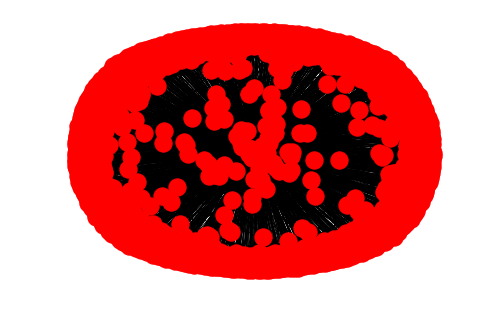

In [39]:
nx.draw(T)

311
0.0032776682916709887
0.02758815514885934


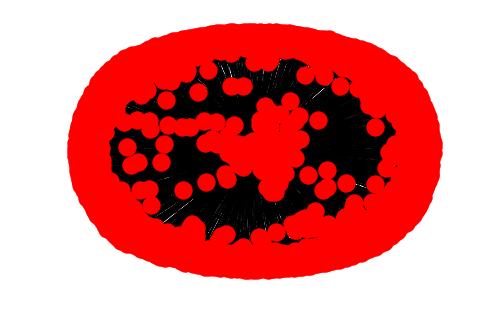

In [40]:
print(nx.degree(G, 'wanderinganimal'))
print(nx.clustering(G, 'wanderinganimal'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'wanderinganimal')
nx.draw(T)

97
0.022551546391752577
0.02758815514885934


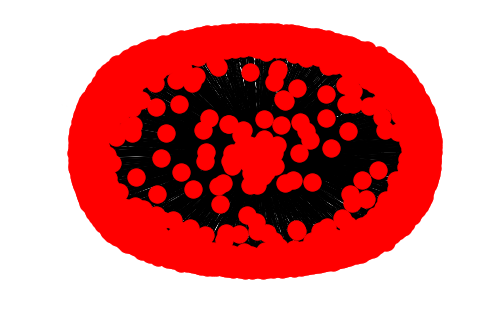

In [41]:
print(nx.degree(G, 'Surfhempster'))
print(nx.clustering(G, 'Surfhempster'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'Surfhempster')
nx.draw(T)

1220
0.00034024126198577175
0.02758815514885934


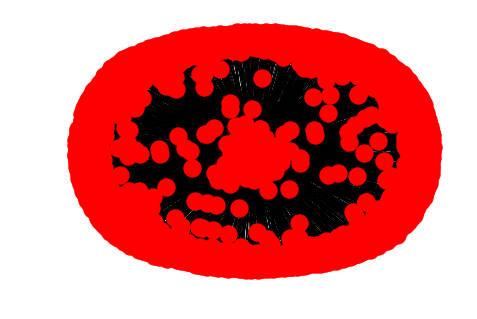

In [42]:
print(nx.degree(G, 'DanPeacock12'))
print(nx.clustering(G, 'DanPeacock12'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'DanPeacock12')
nx.draw(T)

In [43]:
print(nx.degree(G, 'tbigggs'))
print(nx.clustering(G, 'tbigggs'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'tbigggs')
nx.draw(T)

[]
{}
0.02758815514885934


NetworkXError: The node tbigggs is not in the graph.

In [44]:
print(nx.degree(G, 'Matticus_Rox'))
print(nx.clustering(G, 'Matticus_Rox'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'Matticus_Rox')
nx.draw(T)

[]
{}
0.02758815514885934


NetworkXError: The node Matticus_Rox is not in the graph.

In [45]:

print(nx.degree(G, '_geoengineering'))
print(nx.clustering(G, '_geoengineering'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, '_geoengineering')
nx.draw(T)

[]
{}
0.02758815514885934


NetworkXError: The node _geoengineering is not in the graph.

In [46]:

print(nx.degree(G, 'hidenhand1'))
print(nx.clustering(G, 'hidenhand1'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'hidenhand1')
nx.draw(T)

[]
{}
0.02758815514885934


NetworkXError: The node hidenhand1 is not in the graph.

In [47]:

print(nx.degree(G, 'hidenhand1'))
print(nx.clustering(G, 'hidenhand1'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'hidenhand1')
nx.draw(T)

[]
{}
0.02758815514885934


NetworkXError: The node hidenhand1 is not in the graph.

In [48]:

print(nx.degree(G, 'Uniocracy'))
print(nx.clustering(G, 'Uniocracy'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'Uniocracy')
nx.draw(T)

[]
{}
0.02758815514885934


NetworkXError: The node Uniocracy is not in the graph.

In [50]:
print(nx.degree(G, 'TruthBeTheLight'))
print(nx.clustering(G, 'TruthBeTheLight'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'TruthBeTheLight')
nx.draw(T)

[('T', 50), ('T', 50)]
{'T': 0.04}
0.02758815514885934


NetworkXError: The node TruthBeTheLight is not in the graph.